## Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Load the data into Dataframe

In [2]:
data = pd.read_csv("Raisin_Dataset.csv")

## Data Exploration

In [3]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
data.shape

(900, 8)

In [6]:
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [7]:
# Check if data is distributed evenly
data['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

## Data Structuring

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical class to numeric
data['Class'] = label_encoder.fit_transform(data['Class'])

In [9]:
# First 5 rows
data.head(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1


In [10]:
# Last 5 rows
data.tail(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,0


## Data Cleaning

In [11]:
# Check null values
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [12]:
# Check duplicated values
data.duplicated().sum()

0

## Data Visualization

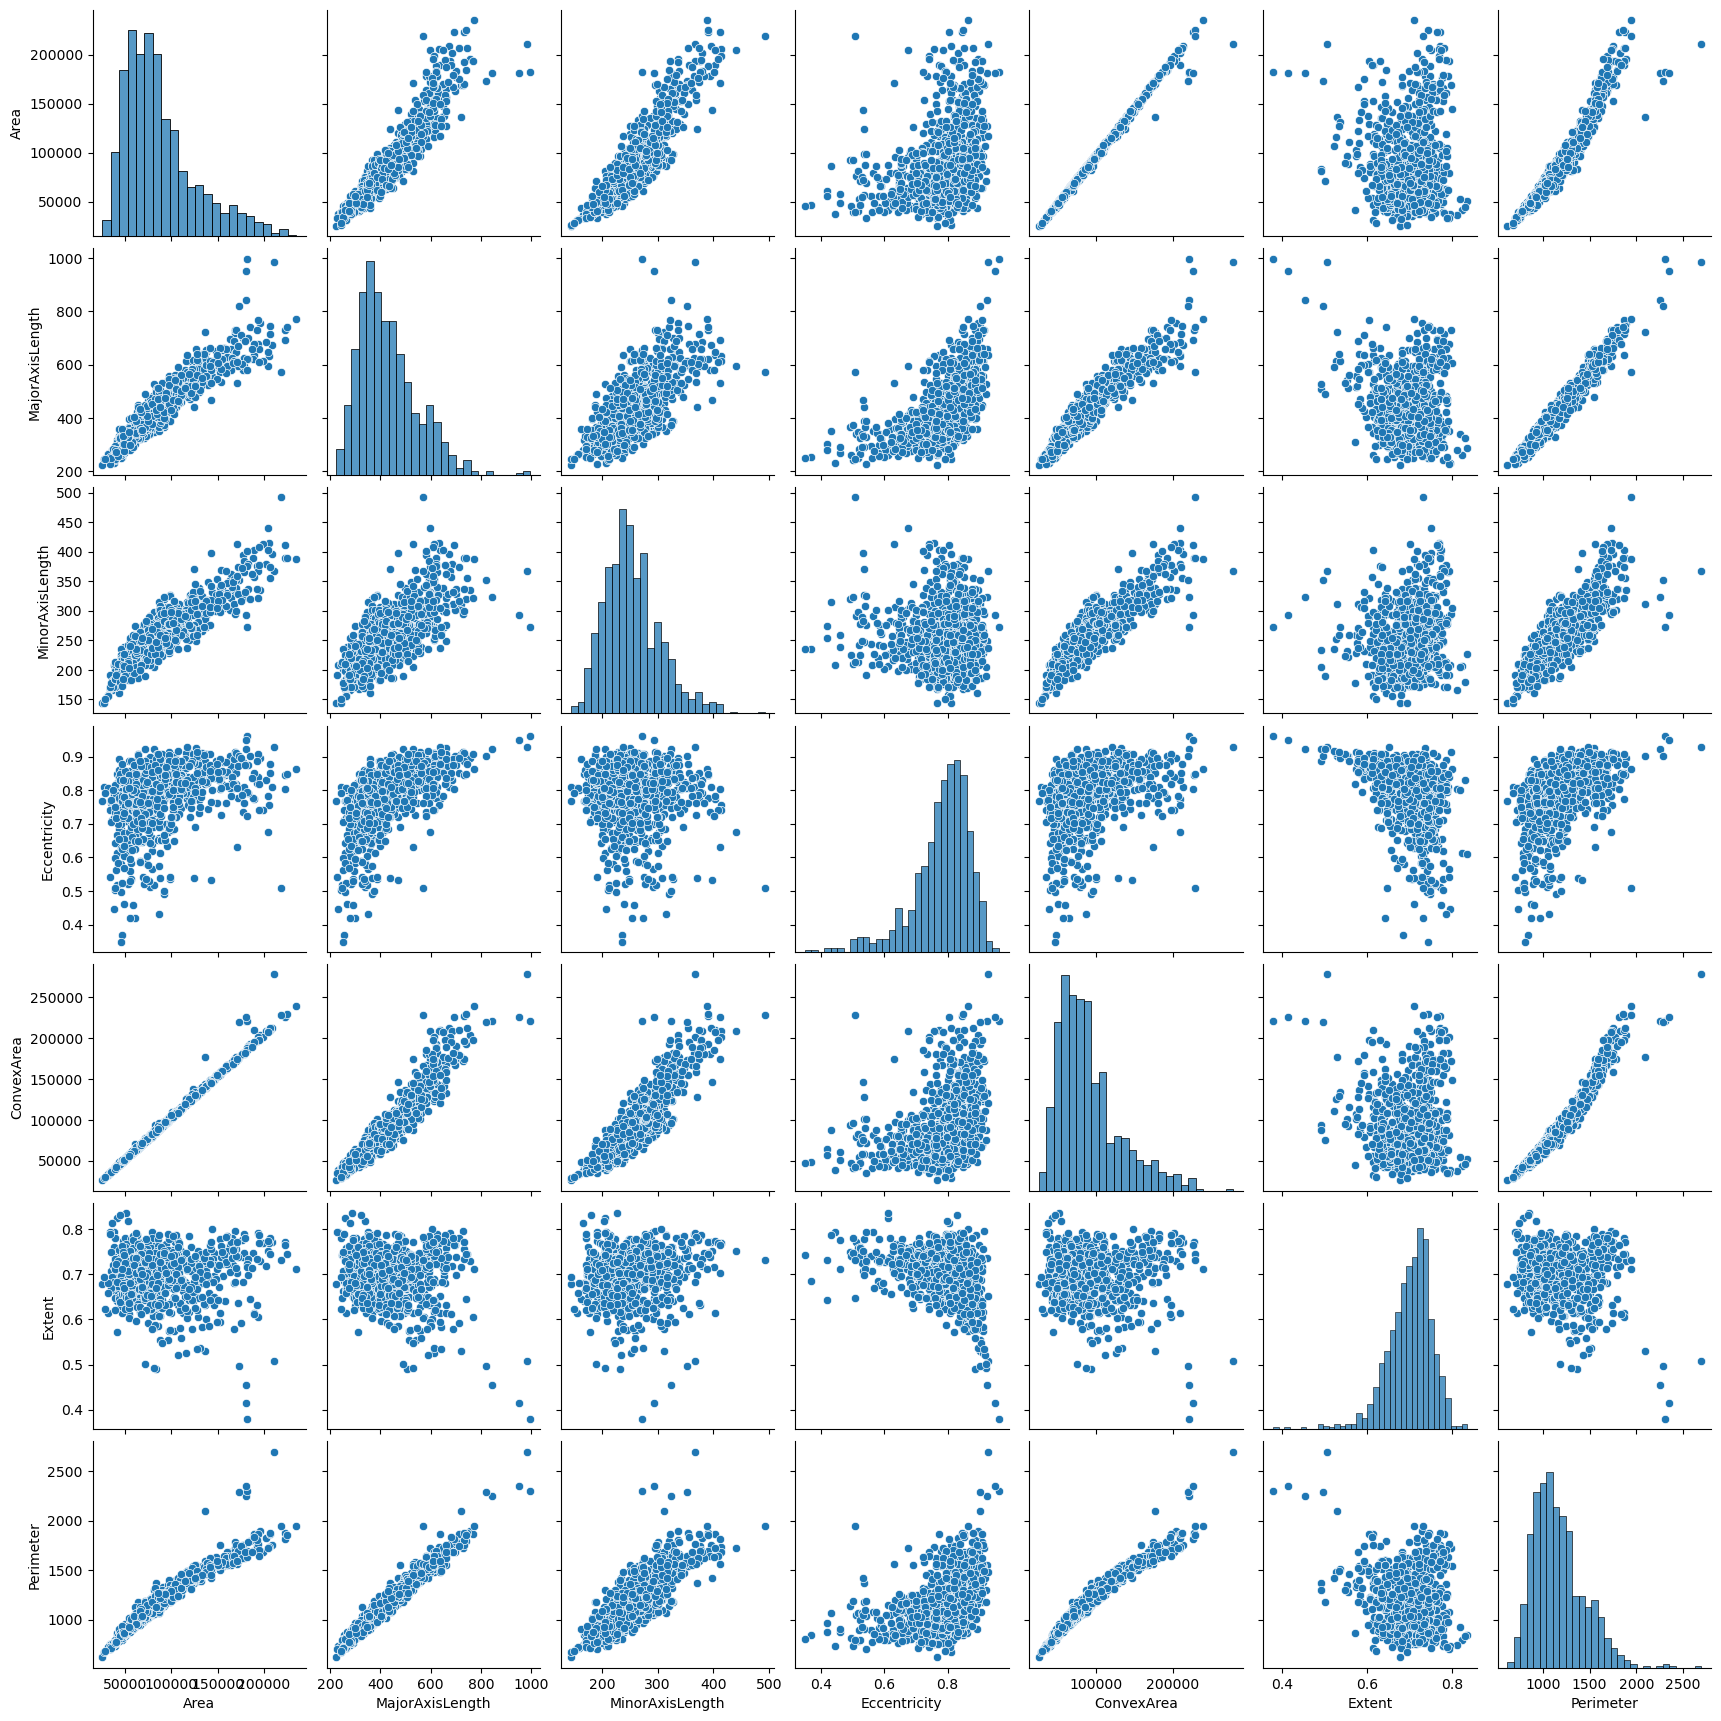

In [13]:
# Pairplot
data_plot = data.drop(columns=['Class'])
sns.pairplot(data_plot)

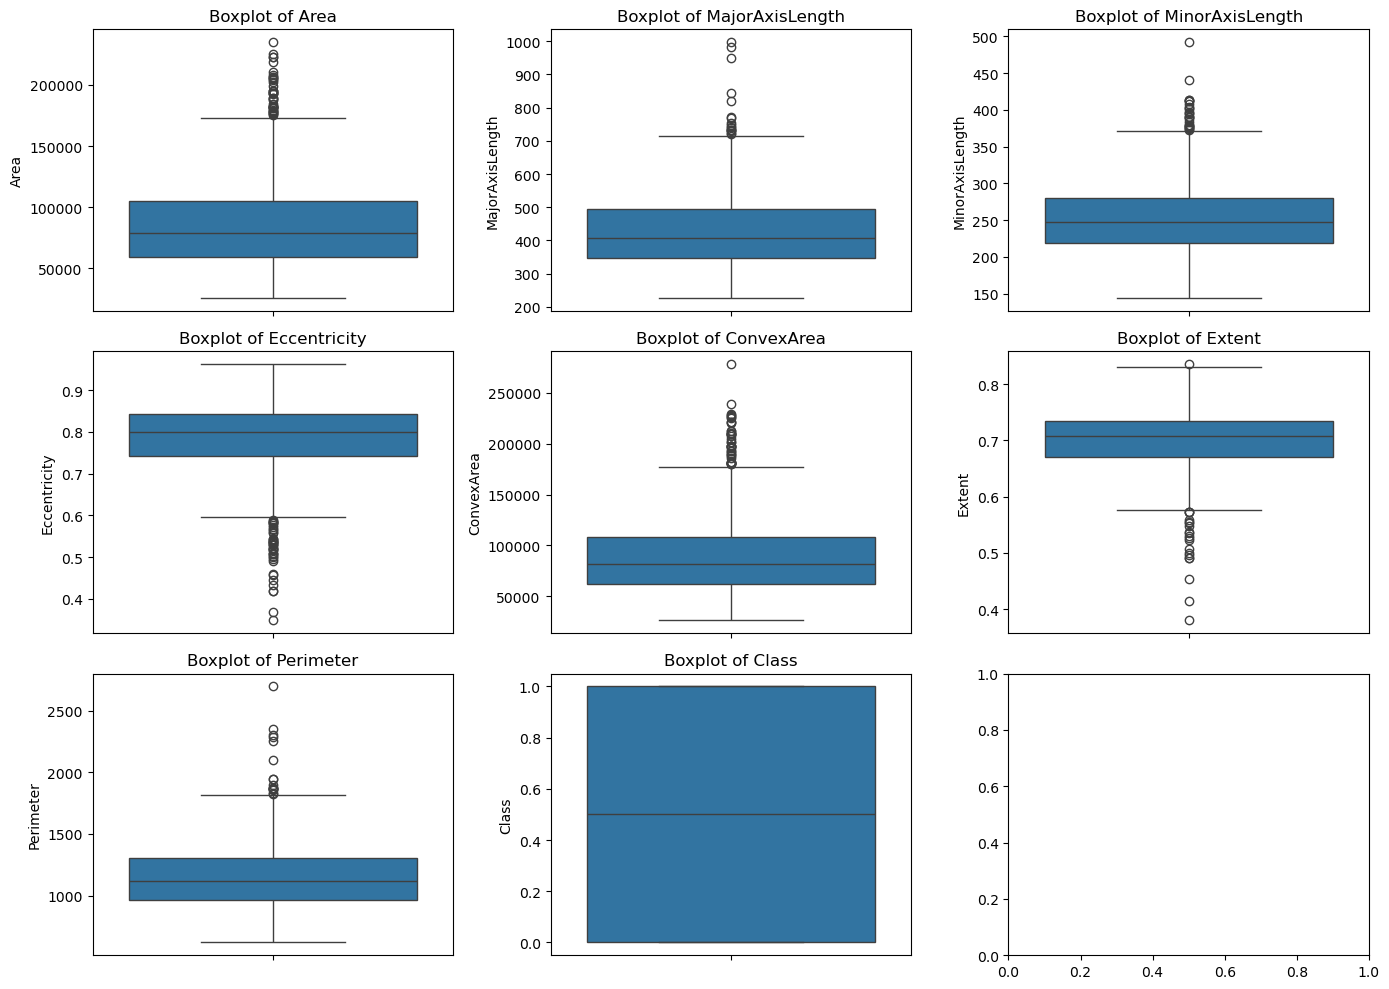

In [14]:
# Checking outliers

check = data.columns.to_list()
num_plots = len(check)
num_rows = 3
num_cols = 3

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(14, 10))

for i, column in enumerate(check):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=data[column], ax=ax[row, col]) #specifying the position of each subplot within the grid of subplots
    ax[row, col].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

## Building an SVM Classifier

In [15]:
X = data.drop(['Class'], axis=1)
y = data['Class']

### Split the dataset to training and test

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)


In [17]:
# Check the shape
print(f'Shape of train set: {X_train.shape}')
print(f'Shape of test set: {X_test.shape}')

Shape of train set: (720, 7)
Shape of test set: (180, 7)


### Feature scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [19]:
print(f'Data type of training set: {X_train.dtype}')
print(f'Data type of test set: {X_test.dtype}')

Data type of training set: float64
Data type of test set: float64


## Data Augmentation

Because the dataset is small, we will use SMOTE to increase the data points by introducing synthetic data
(SMOTE generates new synthetic examples by interpolating between existing examples)

In [20]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [21]:
from sklearn.utils import resample

# Optionally, apply bootstrapping to the entire dataset (both classes)
X_resampled, y_resampled = resample(X_resampled, y_resampled, replace=True, n_samples=2*len(y_resampled), random_state=42)

In [22]:
# Check the shape
print(f'Shape of train set after resampling: {X_resampled.shape}')
print(f'Shape of test set after resampling: {y_resampled.shape}')

Shape of train set after resampling: (1456, 7)
Shape of test set after resampling: (1456,)


## SVM using Default Hyperparameters

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()

tree.fit(X_resampled, y_resampled)
y_pred = tree.predict(X_test)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with default hyperparameters: 0.8056


In [24]:
from sklearn import svm

# Initialize SVM classifier
svc = svm.SVC(kernel='linear')

In [25]:
# Fitting the model
svc.fit(X_resampled, y_resampled)

SVC(kernel='linear')

In [26]:
# Predict on the test set
y_pred = svc.predict(X_test)

## Evaluate performance model

In [27]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score


In [28]:
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8722


In [29]:
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

Recall score: 0.8723404255319149
Precision score: 0.8817204301075269
F1 score: 0.877005347593583


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        86
           1       0.88      0.87      0.88        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



## Confusion Matrix

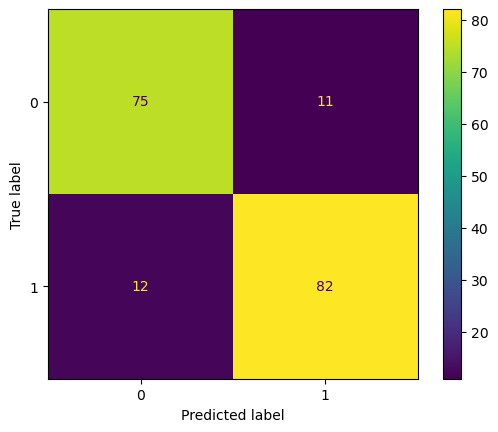

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

## ROC Curve

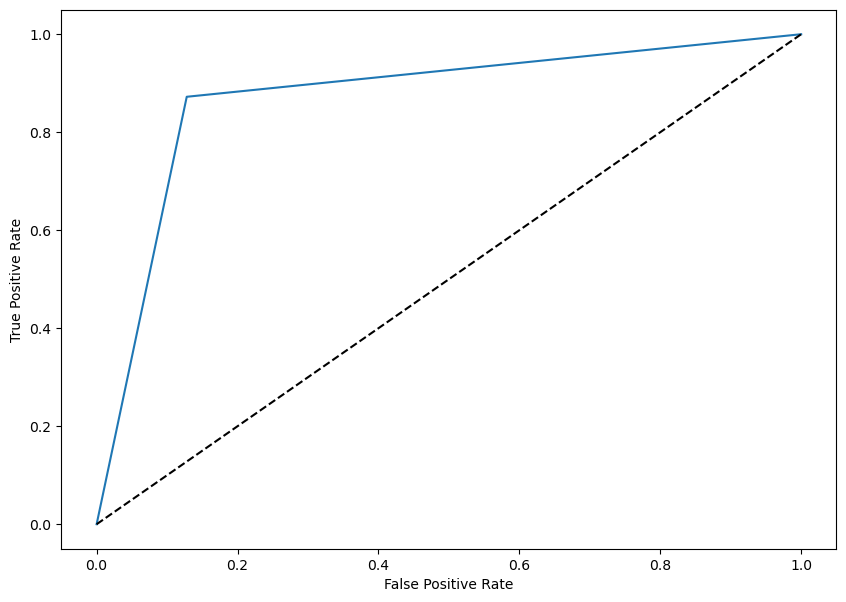

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_pred)
plt.figure(figsize=(10,7))
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], 'k--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## ROC-AUC

In [33]:
from sklearn.metrics import roc_auc_score


ROC_AUC = roc_auc_score(y_test, y_pred)

print('ROC-AUC score: {:.4f}'.format(ROC_AUC))

ROC-AUC score: 0.8722


## Find the best parameters using GridSearchCV

In [34]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV



# Instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc = svm.SVC() 



# Declare parameters for hyperparameter tuning 
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf'], 'gamma':[0.005, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]},
               {'C':[1, 10, 100, 1000], 'kernel':['poly'], 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]} 
              ]



grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)



grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.005, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                    0.7, 0.8, 0.9],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'gamma': [0.01, 0.02, 0.03, 0.04, 0.05],
                          'kernel': ['poly']}],
             scoring='accuracy')

In [35]:
# print best parameter after tuning 
print('Parameters yielding the best result',grid_search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search.best_estimator_) 

Parameters yielding the best result {'C': 1000, 'gamma': 0.8, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.8)


In [36]:
# Print the best accuracy score and best parameters
print("Best Accuracy:", grid_search.best_score_)

Best Accuracy: 0.8832415383891163


In [37]:
grid_predictions = grid_search.predict(X_test) 


# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        86
           1       0.86      0.88      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



## Choosing the best model using real-world data

We can try training the model with unsampled data without bootstrapping to see if bootstrapping has any effects on the model performance

In [38]:
X_train, y_train = smote.fit_resample(X_train, y_train)

# Check the shape
print(f'Shape of train set after SMOTE: {X_train.shape}')
print(f'Shape of test set after SMOTE: {y_train.shape}')

Shape of train set after SMOTE: (728, 7)
Shape of test set after SMOTE: (728,)


In [39]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV



# Instantiate classifier with default hyperparameters with kernel=rbf, C=1.0 and gamma=auto
svc = svm.SVC(random_state=1) 



# Declare parameters for hyperparameter tuning 
parameters = [ {'C':[1, 10, 100, 1000], 'kernel':['linear']},
               {'C':[1, 10, 100, 1000], 'kernel':['rbf']},
               {'C':[1, 10, 100, 1000], 'kernel':['poly']},
                {'C':[1, 10, 100, 1000], 'kernel':['sigmoid']}
              ]

# , 'gamma':[0.005, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# , 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05]

grid_search = GridSearchCV(estimator = svc,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=2)



grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END .................................C=1, kernel=linear; total time=   0.0s
[CV] END ................................C=10, kernel=linear; total time=   0.0s
[CV] END ................................C=10,

GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['sigmoid']}],
             scoring='accuracy', verbose=2)

In [40]:
# print best parameter after tuning 
print('Parameters yielding the best result',grid_search.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_search.best_estimator_) 

Parameters yielding the best result {'C': 10, 'kernel': 'linear'}
SVC(C=10, kernel='linear', random_state=1)


In [41]:
# Print the best accuracy score and best parameters
print("Best Accuracy:", grid_search.best_score_)

Best Accuracy: 0.8765030441400302


In [42]:
grid_predictions = grid_search.predict(X_test) 


# print classification report 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        86
           1       0.88      0.86      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [43]:
my_svm = svm.SVC(C=10, kernel='linear')

# Fit Model
my_svm.fit(X_train,y_train)

# Predict
y_pred = my_svm.predict(X_test)

print('Model accuracy score with chosen hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with chosen hyperparameters: 0.8667


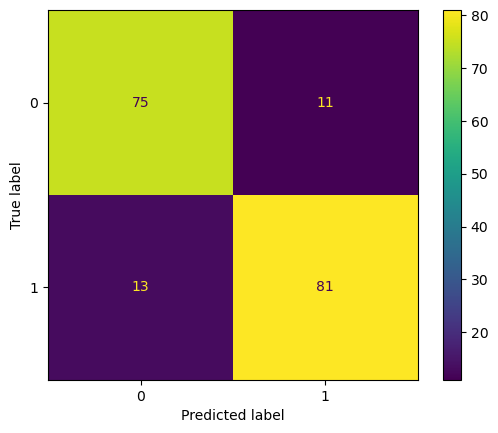

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm_display.plot()
plt.show()

## K-fold Cross-validation

In [45]:
from sklearn.model_selection import KFold, cross_val_score


kfold=KFold(n_splits=5, shuffle=True, random_state=0)

scores = cross_val_score(my_svm, X, y, cv=kfold)

In [46]:
# Print cross-validation scores
print("Cross-validation Scores:", scores)
print("Mean Cross-validation Score:", round(scores.mean(),4))

Cross-validation Scores: [0.87222222 0.81666667 0.85       0.81666667 0.88888889]
Mean Cross-validation Score: 0.8489


## Save Model


In [47]:
## Save Model
import pickle

filename = 'raisin_classification_svm.sav'
pickle.dump(my_svm,open(filename,'wb'))